In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os
%matplotlib inline

2024-05-21 23:26:30.219601: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-21 23:26:30.467305: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 23:26:30.467374: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 23:26:30.510785: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-21 23:26:30.597825: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-21 23:26:30.598730: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
weight_path = '/home/aayush/Documents/pclub_secy/task_3/gender_class_modelKT.hdf5'


In [3]:
from keras_tuner import HyperModel

class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape 

    def build(self, hp):
        model = Sequential()
        model.add(InceptionV3(include_top=False,
                      pooling='avg',
                      weights='imagenet'))
        model.add(Flatten())
        model.add(BatchNormalization())

        model.add(Dense(2048, activation='relu'))
        model.add(BatchNormalization())

        model.add(
            Dense(
                units=hp.Int('units', 32, 2048, 2, default=1024),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape
            )
        )
        model.add(BatchNormalization())

        model.add(
            Dense(
                units=hp.Int('units', 32, 2048, 2, default=1024),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu')
            )
        )
        model.add(BatchNormalization())


        model.add(
            Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )

        model.add(Dense(1, activation='sigmoid'))
        model.layers[0].trainable=False
        
        model.compile(loss='binary_crossentropy', 
                      optimizer='Adam', 
                    metrics=['accuracy'])
        
        return model
     


In [4]:

def get_classes(data):
    prob = model.predict(img)[0][0]
    
    if prob<=0.5:
        return 'female', 1-prob
    else:
        return 'male', prob
     

In [10]:
import os
import shutil
import cv2
img_path = '/media/aayush/New Volume/CMFD_new/38000/'

In [16]:
model =RegressionHyperModel((1024,1024,3))


In [19]:
def create_model():
    model = Sequential()
    model.add(InceptionV3(include_top=False,
                          pooling='avg',
                          weights='imagenet'))
    model.add(Flatten())
    model.add(BatchNormalization())
    
    model.add(Dense(2048, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(320, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dropout(0.005))

    model.add(Dense(1, activation='sigmoid'))

    # Freeze the InceptionV3 layers
    model.layers[0].trainable = False

    model.compile(loss='binary_crossentropy', 
                  optimizer='Adam', 
                  metrics=['accuracy'])
    
    return model

model = create_model()

In [21]:

model.load_weights(weight_path)

ValueError: Layer count mismatch when loading weights from file. Model expected 7 layers, found 9 saved layers.

NameError: name 'model' is not defined

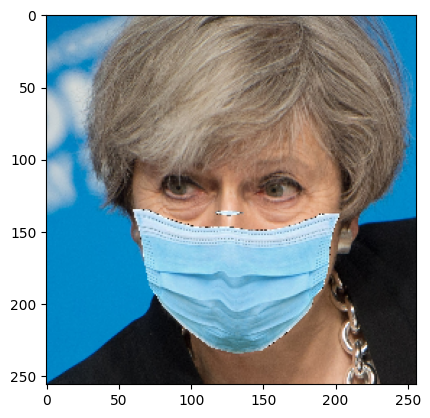

In [11]:
for im in os.listdir(img_path):
    img = load_img(img_path+im, target_size=(256, 256, 3))
    plt.imshow(img) 
    img = img_to_array(img)
    img = img/255.0
    #print(img.shape)
    img = img.reshape(1, 256, 256, 3)
    model.predict(img)
    (pred, prob) = get_classes(img)
    print(pred, prob)
    plt.show()